# Turbo Engine data description

CMAPSS stands for Commercial Modular Aero-Propulsion System Simulation. It is a system developed by NASA to study engine degradation. It is coded in MATLAB and Simulink (A toolbox of MATLAB). 

The engine under study is a turbofan engine (a jet engine). A turbofan engine has many components. A few important components are: Fan, Low Pressure Compressor (LPC), High Pressure Compressor (HPC), Low Pressure Turbine (LPT), High Pressure Turbine (HPT). 

During operation, degradation occurs in each of the components. If degradation level in any component exceeds a threshold, the engine is said to have failed. We don't want jet engines to fail mid-air. Therefore, jet engines are inspected before every take off. This is a form of periodic maintenance that is not cost effective. 

But given the critical nature of operation (considering human lives involved), this form of maintenance strategy is justified. Even then, we need a system that can given us early warning if something is going to fail. 

An early warning, in many cases, may help us prepare for the problem, if not prevent it altogether. A sufficiently early warning will enable us to prevent the disaster. But if an early warning is too conservative, it will lead to unnecessary waste of money. So, aim of a predictive maintenance system is to predict the RUL as accurately as possible such that it is neither too early nor too late. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
raw_data = pd.read_csv('train_FD001.txt', sep=' ', header = None)
raw_data

0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
0      14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190   
1      14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236   
2      14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442   
3      14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739   
4      14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044   
...      ...  ...      ...     ...   ...  ...   ...    ...    ...      ...   
20626  14.62  ...  8137.60  8.4956  0.03  397  2388  100.0  38.49  22.9735   
20627  14.62  ...  8136.50  8.5139  0.03  395  2388  100.0  38.30  23.1594   
20628  14.62  ...  8141.05  8.5646  0.03  398  2388  100.0  38.44  22.9333   
20629  14.62  ...  8139.29  8.5389  0.03  395  2388  100.0  38.29  23.0640   
20630  14.62  ...  8137.33  8.5036  0.03  396  2388  100.0  38.37  23.0522   

       26  27  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN  
...    ..  ..  
20626 NaN NaN  
20627 NaN NaN  
20628 NaN NaN  
20629 NaN NaN  
20630 NaN NaN  

[20631 rows x 28 columns]

In [3]:
raw_data = raw_data.drop([26,27], axis='columns')

* `Column 1`: Corresponds to engine number (This column is indexed 0 above because of Python's numbering convention)
* `Column 2`: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will go from 1 to 192. Similarly for other engines. 
* `Columns 3,4,5`: 3 operational settings
* `Columns 6-26`: 21 sensor measurements

In [4]:
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1        1      2  0.0019 -0.0003   100.0          518.67          642.15   
2        1      3 -0.0043  0.0003   100.0          518.67          642.35   
3        1      4  0.0007  0.0000   100.0          518.67          642.35   
4        1      5 -0.0019 -0.0002   100.0          518.67          642.37   
...    ...    ...     ...     ...     ...             ...             ...   
20626  100    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627  100    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628  100    198  0.0004  0.0000   100.0          518.67          643.42   
20629  100    199 -0.0011  0.0003   100.0          518.67          643.23   
20630  100    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure12  \
0             1589.70         1400.60           14.62  ...           521.66   
1             1591.82         1403.14           14.62  ...           522.28   
2             1587.99         1404.20           14.62  ...           522.42   
3             1582.79         1401.87           14.62  ...           522.86   
4             1582.85         1406.22           14.62  ...           522.19   
...               ...             ...             ...  ...              ...   
20626         1597.98         1428.63           14.62  ...           519.49   
20627         1604.50         1433.58           14.62  ...           519.68   
20628         1602.46         1428.18           14.62  ...           520.01   
20629         1605.26         1426.53           14.62  ...           519.67   
20630         1600.38         1432.14           14.62  ...           519.30   

       SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  \
0              2388.02          8138.62           8.4195             0.03   
1              2388.07          8131.49           8.4318             0.03   
2              2388.03          8133.23           8.4178             0.03   
3              2388.08          8133.83           8.3682             0.03   
4              2388.04          8133.80           8.4294             0.03   
...                ...              ...              ...              ...   
20626          2388.26          8137.60           8.4956             0.03   
20627          2388.22          8136.50           8.5139             0.03   
20628          2388.24          8141.05           8.5646             0.03   
20629          2388.23          8139.29           8.5389             0.03   
20630          2388.26          8137.33           8.5036             0.03   

       SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  \
0                  392             2388            100.0            39.06   
1                  392             2388            100.0            39.00   
2                  390             2388            100.0            38.95   
3                  392             2388            100.0            38.88   
4                  393             2388            100.0            38.90   
...                ...              ...              ...              ...   
20626              397             2388            100.0            38.49   
20627              395             2388            100.0            38.30   
20628              398             2388            100.0            38.44   
20629              395             2388            100.0            38.29   
20630              396             2388            100.0            38.37   

       SensorMeasure21  
0              23.4190  
1              23.4236  
2              23.3442  
3              23.3739  
4              23.4044  
...                ...  
20626          22.9735  
20627          23.1594  
20628          22.9333  
20629          23.0640  
20630    

In [5]:
raw_data[raw_data['ID'] == 1]

ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0     1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1     1      2  0.0019 -0.0003   100.0          518.67          642.15   
2     1      3 -0.0043  0.0003   100.0          518.67          642.35   
3     1      4  0.0007  0.0000   100.0          518.67          642.35   
4     1      5 -0.0019 -0.0002   100.0          518.67          642.37   
..   ..    ...     ...     ...     ...             ...             ...   
187   1    188 -0.0067  0.0003   100.0          518.67          643.75   
188   1    189 -0.0006  0.0002   100.0          518.67          644.18   
189   1    190 -0.0027  0.0001   100.0          518.67          643.64   
190   1    191 -0.0000 -0.0004   100.0          518.67          643.34   
191   1    192  0.0009 -0.0000   100.0          518.67          643.54   

     SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure12  \
0           1589.70         1400.60           14.62  ...           521.66   
1           1591.82         1403.14           14.62  ...           522.28   
2           1587.99         1404.20           14.62  ...           522.42   
3           1582.79         1401.87           14.62  ...           522.86   
4           1582.85         1406.22           14.62  ...           522.19   
..              ...             ...             ...  ...              ...   
187         1602.38         1422.78           14.62  ...           519.79   
188         1596.17         1428.01           14.62  ...           519.58   
189         1599.22         1425.95           14.62  ...           520.04   
190         1602.36         1425.77           14.62  ...           519.57   
191         1601.41         1427.20           14.62  ...           520.08   

     SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  \
0            2388.02          8138.62           8.4195             0.03   
1            2388.07          8131.49           8.4318             0.03   
2            2388.03          8133.23           8.4178             0.03   
3            2388.08          8133.83           8.3682             0.03   
4            2388.04          8133.80           8.4294             0.03   
..               ...              ...              ...              ...   
187          2388.23          8117.69           8.5207             0.03   
188          2388.33          8117.51           8.5183             0.03   
189          2388.35          8112.58           8.5223             0.03   
190          2388.30          8114.61           8.5174             0.03   
191          2388.32          8110.93           8.5113             0.03   

     SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  \
0                392             2388            100.0            39.06   
1                392             2388            100.0            39.00   
2                390             2388            100.0            38.95   
3                392             2388            100.0            38.88   
4                393             2388            100.0            38.90   
..               ...              ...              ...              ...   
187              396             2388            100.0            38.51   
188              395             2388            100.0            38.48   
189              398             2388            100.0            38.49   
190              394             2388            100.0            38.45   
191              396             2388            100.0            38.48   

     SensorMeasure21  
0            23.4190  
1            23.4236  
2            23.3442  
3            23.3739  
4            23.4044  
..               ...  
187          22.9588  
188          23.1127  
189          23.0675  
190          23.1295  
191          22.9649  

[192 rows x 26 columns]

In [6]:
# Making an array which contains EOL of all the Ids
EOL=[]
for sl_no in raw_data['ID']:
        print(raw_data[raw_data['ID'] == sl_no]["Cycle"])
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3      

0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: Cycle, Length: 192, dtype: int64
0        1
1        2
2        3
3      

192      1
193      2
194      3
195      4
196      5
      ... 
474    283
475    284
476    285
477    286
478    287
Name: Cycle, Length: 287, dtype: int64
192      1
193      2
194      3
195      4
196      5
      ... 
474    283
475    284
476    285
477    286
478    287
Name: Cycle, Length: 287, dtype: int64
192      1
193      2
194      3
195      4
196      5
      ... 
474    283
475    284
476    285
477    286
478    287
Name: Cycle, Length: 287, dtype: int64
192      1
193      2
194      3
195      4
196      5
      ... 
474    283
475    284
476    285
477    286
478    287
Name: Cycle, Length: 287, dtype: int64
192      1
193      2
194      3
195      4
196      5
      ... 
474    283
475    284
476    285
477    286
478    287
Name: Cycle, Length: 287, dtype: int64
192      1
193      2
194      3
195      4
196      5
      ... 
474    283
475    284
476    285
477    286
478    287
Name: Cycle, Length: 287, dtype: int64
192      1
193      2
194      3
195    

479      1
480      2
481      3
482      4
483      5
      ... 
653    175
654    176
655    177
656    178
657    179
Name: Cycle, Length: 179, dtype: int64
479      1
480      2
481      3
482      4
483      5
      ... 
653    175
654    176
655    177
656    178
657    179
Name: Cycle, Length: 179, dtype: int64
479      1
480      2
481      3
482      4
483      5
      ... 
653    175
654    176
655    177
656    178
657    179
Name: Cycle, Length: 179, dtype: int64
479      1
480      2
481      3
482      4
483      5
      ... 
653    175
654    176
655    177
656    178
657    179
Name: Cycle, Length: 179, dtype: int64
479      1
480      2
481      3
482      4
483      5
      ... 
653    175
654    176
655    177
656    178
657    179
Name: Cycle, Length: 179, dtype: int64
479      1
480      2
481      3
482      4
483      5
      ... 
653    175
654    176
655    177
656    178
657    179
Name: Cycle, Length: 179, dtype: int64
479      1
480      2
481      3
482    

658      1
659      2
660      3
661      4
662      5
      ... 
842    185
843    186
844    187
845    188
846    189
Name: Cycle, Length: 189, dtype: int64
658      1
659      2
660      3
661      4
662      5
      ... 
842    185
843    186
844    187
845    188
846    189
Name: Cycle, Length: 189, dtype: int64
658      1
659      2
660      3
661      4
662      5
      ... 
842    185
843    186
844    187
845    188
846    189
Name: Cycle, Length: 189, dtype: int64
658      1
659      2
660      3
661      4
662      5
      ... 
842    185
843    186
844    187
845    188
846    189
Name: Cycle, Length: 189, dtype: int64
658      1
659      2
660      3
661      4
662      5
      ... 
842    185
843    186
844    187
845    188
846    189
Name: Cycle, Length: 189, dtype: int64
658      1
659      2
660      3
661      4
662      5
      ... 
842    185
843    186
844    187
845    188
846    189
Name: Cycle, Length: 189, dtype: int64
658      1
659      2
660      3
661    

847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, 

847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, Length: 269, dtype: int64
847       1
848       2
849       3
850       4
851       5
       ... 
1111    265
1112    266
1113    267
1114    268
1115    269
Name: Cycle, 

1116      1
1117      2
1118      3
1119      4
1120      5
       ... 
1299    184
1300    185
1301    186
1302    187
1303    188
Name: Cycle, Length: 188, dtype: int64
1116      1
1117      2
1118      3
1119      4
1120      5
       ... 
1299    184
1300    185
1301    186
1302    187
1303    188
Name: Cycle, Length: 188, dtype: int64
1116      1
1117      2
1118      3
1119      4
1120      5
       ... 
1299    184
1300    185
1301    186
1302    187
1303    188
Name: Cycle, Length: 188, dtype: int64
1116      1
1117      2
1118      3
1119      4
1120      5
       ... 
1299    184
1300    185
1301    186
1302    187
1303    188
Name: Cycle, Length: 188, dtype: int64
1116      1
1117      2
1118      3
1119      4
1120      5
       ... 
1299    184
1300    185
1301    186
1302    187
1303    188
Name: Cycle, Length: 188, dtype: int64
1116      1
1117      2
1118      3
1119      4
1120      5
       ... 
1299    184
1300    185
1301    186
1302    187
1303    188
Name: Cycle, 

1304      1
1305      2
1306      3
1307      4
1308      5
       ... 
1558    255
1559    256
1560    257
1561    258
1562    259
Name: Cycle, Length: 259, dtype: int64
1304      1
1305      2
1306      3
1307      4
1308      5
       ... 
1558    255
1559    256
1560    257
1561    258
1562    259
Name: Cycle, Length: 259, dtype: int64
1304      1
1305      2
1306      3
1307      4
1308      5
       ... 
1558    255
1559    256
1560    257
1561    258
1562    259
Name: Cycle, Length: 259, dtype: int64
1304      1
1305      2
1306      3
1307      4
1308      5
       ... 
1558    255
1559    256
1560    257
1561    258
1562    259
Name: Cycle, Length: 259, dtype: int64
1304      1
1305      2
1306      3
1307      4
1308      5
       ... 
1558    255
1559    256
1560    257
1561    258
1562    259
Name: Cycle, Length: 259, dtype: int64
1304      1
1305      2
1306      3
1307      4
1308      5
       ... 
1558    255
1559    256
1560    257
1561    258
1562    259
Name: Cycle, 

1563      1
1564      2
1565      3
1566      4
1567      5
       ... 
1708    146
1709    147
1710    148
1711    149
1712    150
Name: Cycle, Length: 150, dtype: int64
1563      1
1564      2
1565      3
1566      4
1567      5
       ... 
1708    146
1709    147
1710    148
1711    149
1712    150
Name: Cycle, Length: 150, dtype: int64
1563      1
1564      2
1565      3
1566      4
1567      5
       ... 
1708    146
1709    147
1710    148
1711    149
1712    150
Name: Cycle, Length: 150, dtype: int64
1563      1
1564      2
1565      3
1566      4
1567      5
       ... 
1708    146
1709    147
1710    148
1711    149
1712    150
Name: Cycle, Length: 150, dtype: int64
1563      1
1564      2
1565      3
1566      4
1567      5
       ... 
1708    146
1709    147
1710    148
1711    149
1712    150
Name: Cycle, Length: 150, dtype: int64
1563      1
1564      2
1565      3
1566      4
1567      5
       ... 
1708    146
1709    147
1710    148
1711    149
1712    150
Name: Cycle, 

1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, 

1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, Length: 201, dtype: int64
1713      1
1714      2
1715      3
1716      4
1717      5
       ... 
1909    197
1910    198
1911    199
1912    200
1913    201
Name: Cycle, 

1914      1
1915      2
1916      3
1917      4
1918      5
       ... 
2131    218
2132    219
2133    220
2134    221
2135    222
Name: Cycle, Length: 222, dtype: int64
1914      1
1915      2
1916      3
1917      4
1918      5
       ... 
2131    218
2132    219
2133    220
2134    221
2135    222
Name: Cycle, Length: 222, dtype: int64
1914      1
1915      2
1916      3
1917      4
1918      5
       ... 
2131    218
2132    219
2133    220
2134    221
2135    222
Name: Cycle, Length: 222, dtype: int64
1914      1
1915      2
1916      3
1917      4
1918      5
       ... 
2131    218
2132    219
2133    220
2134    221
2135    222
Name: Cycle, Length: 222, dtype: int64
1914      1
1915      2
1916      3
1917      4
1918      5
       ... 
2131    218
2132    219
2133    220
2134    221
2135    222
Name: Cycle, Length: 222, dtype: int64
1914      1
1915      2
1916      3
1917      4
1918      5
       ... 
2131    218
2132    219
2133    220
2134    221
2135    222
Name: Cycle, 

2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, 

2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, Length: 240, dtype: int64
2136      1
2137      2
2138      3
2139      4
2140      5
       ... 
2371    236
2372    237
2373    238
2374    239
2375    240
Name: Cycle, 

2376      1
2377      2
2378      3
2379      4
2380      5
       ... 
2541    166
2542    167
2543    168
2544    169
2545    170
Name: Cycle, Length: 170, dtype: int64
2376      1
2377      2
2378      3
2379      4
2380      5
       ... 
2541    166
2542    167
2543    168
2544    169
2545    170
Name: Cycle, Length: 170, dtype: int64
2376      1
2377      2
2378      3
2379      4
2380      5
       ... 
2541    166
2542    167
2543    168
2544    169
2545    170
Name: Cycle, Length: 170, dtype: int64
2376      1
2377      2
2378      3
2379      4
2380      5
       ... 
2541    166
2542    167
2543    168
2544    169
2545    170
Name: Cycle, Length: 170, dtype: int64
2376      1
2377      2
2378      3
2379      4
2380      5
       ... 
2541    166
2542    167
2543    168
2544    169
2545    170
Name: Cycle, Length: 170, dtype: int64
2376      1
2377      2
2378      3
2379      4
2380      5
       ... 
2541    166
2542    167
2543    168
2544    169
2545    170
Name: Cycle, 

2546      1
2547      2
2548      3
2549      4
2550      5
       ... 
2704    159
2705    160
2706    161
2707    162
2708    163
Name: Cycle, Length: 163, dtype: int64
2546      1
2547      2
2548      3
2549      4
2550      5
       ... 
2704    159
2705    160
2706    161
2707    162
2708    163
Name: Cycle, Length: 163, dtype: int64
2546      1
2547      2
2548      3
2549      4
2550      5
       ... 
2704    159
2705    160
2706    161
2707    162
2708    163
Name: Cycle, Length: 163, dtype: int64
2546      1
2547      2
2548      3
2549      4
2550      5
       ... 
2704    159
2705    160
2706    161
2707    162
2708    163
Name: Cycle, Length: 163, dtype: int64
2546      1
2547      2
2548      3
2549      4
2550      5
       ... 
2704    159
2705    160
2706    161
2707    162
2708    163
Name: Cycle, Length: 163, dtype: int64
2546      1
2547      2
2548      3
2549      4
2550      5
       ... 
2704    159
2705    160
2706    161
2707    162
2708    163
Name: Cycle, 

2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, 

2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, Length: 180, dtype: int64
2709      1
2710      2
2711      3
2712      4
2713      5
       ... 
2884    176
2885    177
2886    178
2887    179
2888    180
Name: Cycle, 

2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, 

2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, Length: 207, dtype: int64
2889      1
2890      2
2891      3
2892      4
2893      5
       ... 
3091    203
3092    204
3093    205
3094    206
3095    207
Name: Cycle, 

3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, 

3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, Length: 209, dtype: int64
3096      1
3097      2
3098      3
3099      4
3100      5
       ... 
3300    205
3301    206
3302    207
3303    208
3304    209
Name: Cycle, 

3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, 

3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, 

3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3305      1
3306      2
3307      3
3308      4
3309      5
       ... 
3576    272
3577    273
3578    274
3579    275
3580    276
Name: Cycle, Length: 276, dtype: int64
3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, Length: 195, dtype: int64
3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, 

3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, Length: 195, dtype: int64
3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, Length: 195, dtype: int64
3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, Length: 195, dtype: int64
3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, Length: 195, dtype: int64
3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, Length: 195, dtype: int64
3581      1
3582      2
3583      3
3584      4
3585      5
       ... 
3771    191
3772    192
3773    193
3774    194
3775    195
Name: Cycle, 

3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, 

3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, Length: 158, dtype: int64
3776      1
3777      2
3778      3
3779      4
3780      5
       ... 
3929    154
3930    155
3931    156
3932    157
3933    158
Name: Cycle, 

3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, 

3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, 

3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, Length: 234, dtype: int64
3934      1
3935      2
3936      3
3937      4
3938      5
       ... 
4163    230
4164    231
4165    232
4166    233
4167    234
Name: Cycle, 

4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, 

4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, Length: 195, dtype: int64
4168      1
4169      2
4170      3
4171      4
4172      5
       ... 
4358    191
4359    192
4360    193
4361    194
4362    195
Name: Cycle, 

4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, 

4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, Length: 202, dtype: int64
4363      1
4364      2
4365      3
4366      4
4367      5
       ... 
4560    198
4561    199
4562    200
4563    201
4564    202
Name: Cycle, 

4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, Length: 168, dtype: int64
4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, Length: 168, dtype: int64
4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, Length: 168, dtype: int64
4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, Length: 168, dtype: int64
4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, Length: 168, dtype: int64
4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, 

4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, Length: 168, dtype: int64
4565      1
4566      2
4567      3
4568      4
4569      5
       ... 
4728    164
4729    165
4730    166
4731    167
4732    168
Name: Cycle, Length: 168, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, 

4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, Length: 147, dtype: int64
4733      1
4734      2
4735      3
4736      4
4737      5
       ... 
4875    143
4876    144
4877    145
4878    146
4879    147
Name: Cycle, 

4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, 

4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, Length: 230, dtype: int64
4880      1
4881      2
4882      3
4883      4
4884      5
       ... 
5105    226
5106    227
5107    228
5108    229
5109    230
Name: Cycle, 

5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, 

5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, Length: 199, dtype: int64
5110      1
5111      2
5112      3
5113      4
5114      5
       ... 
5304    195
5305    196
5306    197
5307    198
5308    199
Name: Cycle, 

5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, 

5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, Length: 156, dtype: int64
5309      1
5310      2
5311      3
5312      4
5313      5
       ... 
5460    152
5461    153
5462    154
5463    155
5464    156
Name: Cycle, 

5465      1
5466      2
5467      3
5468      4
5469      5
       ... 
5625    161
5626    162
5627    163
5628    164
5629    165
Name: Cycle, Length: 165, dtype: int64
5465      1
5466      2
5467      3
5468      4
5469      5
       ... 
5625    161
5626    162
5627    163
5628    164
5629    165
Name: Cycle, Length: 165, dtype: int64
5465      1
5466      2
5467      3
5468      4
5469      5
       ... 
5625    161
5626    162
5627    163
5628    164
5629    165
Name: Cycle, Length: 165, dtype: int64
5465      1
5466      2
5467      3
5468      4
5469      5
       ... 
5625    161
5626    162
5627    163
5628    164
5629    165
Name: Cycle, Length: 165, dtype: int64
5465      1
5466      2
5467      3
5468      4
5469      5
       ... 
5625    161
5626    162
5627    163
5628    164
5629    165
Name: Cycle, Length: 165, dtype: int64
5465      1
5466      2
5467      3
5468      4
5469      5
       ... 
5625    161
5626    162
5627    163
5628    164
5629    165
Name: Cycle, 

5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, 

5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, Length: 163, dtype: int64
5630      1
5631      2
5632      3
5633      4
5634      5
       ... 
5788    159
5789    160
5790    161
5791    162
5792    163
Name: Cycle, 

5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, 

5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, Length: 194, dtype: int64
5793      1
5794      2
5795      3
5796      4
5797      5
       ... 
5982    190
5983    191
5984    192
5985    193
5986    194
Name: Cycle, 

5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, 

5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, Length: 234, dtype: int64
5987      1
5988      2
5989      3
5990      4
5991      5
       ... 
6216    230
6217    231
6218    232
6219    233
6220    234
Name: Cycle, 

6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, 

6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, Length: 191, dtype: int64
6221      1
6222      2
6223      3
6224      4
6225      5
       ... 
6407    187
6408    188
6409    189
6410    190
6411    191
Name: Cycle, 

6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, 

6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, Length: 200, dtype: int64
6412      1
6413      2
6414      3
6415      4
6416      5
       ... 
6607    196
6608    197
6609    198
6610    199
6611    200
Name: Cycle, 

6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, 

6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, Length: 195, dtype: int64
6612      1
6613      2
6614      3
6615      4
6616      5
       ... 
6802    191
6803    192
6804    193
6805    194
6806    195
Name: Cycle, 

6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, 

6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, Length: 181, dtype: int64
6807      1
6808      2
6809      3
6810      4
6811      5
       ... 
6983    177
6984    178
6985    179
6986    180
6987    181
Name: Cycle, 

6988      1
6989      2
6990      3
6991      4
6992      5
       ... 
7141    154
7142    155
7143    156
7144    157
7145    158
Name: Cycle, Length: 158, dtype: int64
6988      1
6989      2
6990      3
6991      4
6992      5
       ... 
7141    154
7142    155
7143    156
7144    157
7145    158
Name: Cycle, Length: 158, dtype: int64
6988      1
6989      2
6990      3
6991      4
6992      5
       ... 
7141    154
7142    155
7143    156
7144    157
7145    158
Name: Cycle, Length: 158, dtype: int64
6988      1
6989      2
6990      3
6991      4
6992      5
       ... 
7141    154
7142    155
7143    156
7144    157
7145    158
Name: Cycle, Length: 158, dtype: int64
6988      1
6989      2
6990      3
6991      4
6992      5
       ... 
7141    154
7142    155
7143    156
7144    157
7145    158
Name: Cycle, Length: 158, dtype: int64
6988      1
6989      2
6990      3
6991      4
6992      5
       ... 
7141    154
7142    155
7143    156
7144    157
7145    158
Name: Cycle, 

7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, 

7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, Length: 170, dtype: int64
7146      1
7147      2
7148      3
7149      4
7150      5
       ... 
7311    166
7312    167
7313    168
7314    169
7315    170
Name: Cycle, 

7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, 

7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, Length: 194, dtype: int64
7316      1
7317      2
7318      3
7319      4
7320      5
       ... 
7505    190
7506    191
7507    192
7508    193
7509    194
Name: Cycle, 

7510      1
7511      2
7512      3
7513      4
7514      5
       ... 
7633    124
7634    125
7635    126
7636    127
7637    128
Name: Cycle, Length: 128, dtype: int64
7510      1
7511      2
7512      3
7513      4
7514      5
       ... 
7633    124
7634    125
7635    126
7636    127
7637    128
Name: Cycle, Length: 128, dtype: int64
7510      1
7511      2
7512      3
7513      4
7514      5
       ... 
7633    124
7634    125
7635    126
7636    127
7637    128
Name: Cycle, Length: 128, dtype: int64
7510      1
7511      2
7512      3
7513      4
7514      5
       ... 
7633    124
7634    125
7635    126
7636    127
7637    128
Name: Cycle, Length: 128, dtype: int64
7510      1
7511      2
7512      3
7513      4
7514      5
       ... 
7633    124
7634    125
7635    126
7636    127
7637    128
Name: Cycle, Length: 128, dtype: int64
7510      1
7511      2
7512      3
7513      4
7514      5
       ... 
7633    124
7634    125
7635    126
7636    127
7637    128
Name: Cycle, 

7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, 

7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, Length: 188, dtype: int64
7638      1
7639      2
7640      3
7641      4
7642      5
       ... 
7821    184
7822    185
7823    186
7824    187
7825    188
Name: Cycle, 

7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, 

7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, Length: 216, dtype: int64
7826      1
7827      2
7828      3
7829      4
7830      5
       ... 
8037    212
8038    213
8039    214
8040    215
8041    216
Name: Cycle, 

8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, 

8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, Length: 196, dtype: int64
8042      1
8043      2
8044      3
8045      4
8046      5
       ... 
8233    192
8234    193
8235    194
8236    195
8237    196
Name: Cycle, 

8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, 

8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, Length: 207, dtype: int64
8238      1
8239      2
8240      3
8241      4
8242      5
       ... 
8440    203
8441    204
8442    205
8443    206
8444    207
Name: Cycle, 

8445      1
8446      2
8447      3
8448      4
8449      5
       ... 
8632    188
8633    189
8634    190
8635    191
8636    192
Name: Cycle, Length: 192, dtype: int64
8445      1
8446      2
8447      3
8448      4
8449      5
       ... 
8632    188
8633    189
8634    190
8635    191
8636    192
Name: Cycle, Length: 192, dtype: int64
8445      1
8446      2
8447      3
8448      4
8449      5
       ... 
8632    188
8633    189
8634    190
8635    191
8636    192
Name: Cycle, Length: 192, dtype: int64
8445      1
8446      2
8447      3
8448      4
8449      5
       ... 
8632    188
8633    189
8634    190
8635    191
8636    192
Name: Cycle, Length: 192, dtype: int64
8445      1
8446      2
8447      3
8448      4
8449      5
       ... 
8632    188
8633    189
8634    190
8635    191
8636    192
Name: Cycle, Length: 192, dtype: int64
8445      1
8446      2
8447      3
8448      4
8449      5
       ... 
8632    188
8633    189
8634    190
8635    191
8636    192
Name: Cycle, 

8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, 

8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, Length: 158, dtype: int64
8637      1
8638      2
8639      3
8640      4
8641      5
       ... 
8790    154
8791    155
8792    156
8793    157
8794    158
Name: Cycle, 

8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, 

8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, Length: 256, dtype: int64
8795      1
8796      2
8797      3
8798      4
8799      5
       ... 
9046    252
9047    253
9048    254
9049    255
9050    256
Name: Cycle, 

9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, 

9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, Length: 214, dtype: int64
9051      1
9052      2
9053      3
9054      4
9055      5
       ... 
9260    210
9261    211
9262    212
9263    213
9264    214
Name: Cycle, 

9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, 

9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, Length: 231, dtype: int64
9265      1
9266      2
9267      3
9268      4
9269      5
       ... 
9491    227
9492    228
9493    229
9494    230
9495    231
Name: Cycle, 

9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, 

9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, Length: 215, dtype: int64
9496      1
9497      2
9498      3
9499      4
9500      5
       ... 
9706    211
9707    212
9708    213
9709    214
9710    215
Name: Cycle, 

9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, 

9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, Length: 198, dtype: int64
9711      1
9712      2
9713      3
9714      4
9715      5
       ... 
9904    194
9905    195
9906    196
9907    197
9908    198
Name: Cycle, 

9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209

9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209
10118    210
10119    211
10120    212
10121    213
Name: Cycle, Length: 213, dtype: int64
9909       1
9910       2
9911       3
9912       4
9913       5
        ... 
10117    209

10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209

10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209
10331    210
10332    211
10333    212
10334    213
Name: Cycle, Length: 213, dtype: int64
10122      1
10123      2
10124      3
10125      4
10126      5
        ... 
10330    209

10335      1
10336      2
10337      3
10338      4
10339      5
        ... 
10525    191
10526    192
10527    193
10528    194
10529    195
Name: Cycle, Length: 195, dtype: int64
10335      1
10336      2
10337      3
10338      4
10339      5
        ... 
10525    191
10526    192
10527    193
10528    194
10529    195
Name: Cycle, Length: 195, dtype: int64
10335      1
10336      2
10337      3
10338      4
10339      5
        ... 
10525    191
10526    192
10527    193
10528    194
10529    195
Name: Cycle, Length: 195, dtype: int64
10335      1
10336      2
10337      3
10338      4
10339      5
        ... 
10525    191
10526    192
10527    193
10528    194
10529    195
Name: Cycle, Length: 195, dtype: int64
10335      1
10336      2
10337      3
10338      4
10339      5
        ... 
10525    191
10526    192
10527    193
10528    194
10529    195
Name: Cycle, Length: 195, dtype: int64
10335      1
10336      2
10337      3
10338      4
10339      5
        ... 
10525    191

10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253

10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253

10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253
10783    254
10784    255
10785    256
10786    257
Name: Cycle, Length: 257, dtype: int64
10530      1
10531      2
10532      3
10533      4
10534      5
        ... 
10782    253

10787      1
10788      2
10789      3
10790      4
10791      5
        ... 
10975    189
10976    190
10977    191
10978    192
10979    193
Name: Cycle, Length: 193, dtype: int64
10787      1
10788      2
10789      3
10790      4
10791      5
        ... 
10975    189
10976    190
10977    191
10978    192
10979    193
Name: Cycle, Length: 193, dtype: int64
10787      1
10788      2
10789      3
10790      4
10791      5
        ... 
10975    189
10976    190
10977    191
10978    192
10979    193
Name: Cycle, Length: 193, dtype: int64
10787      1
10788      2
10789      3
10790      4
10791      5
        ... 
10975    189
10976    190
10977    191
10978    192
10979    193
Name: Cycle, Length: 193, dtype: int64
10787      1
10788      2
10789      3
10790      4
10791      5
        ... 
10975    189
10976    190
10977    191
10978    192
10979    193
Name: Cycle, Length: 193, dtype: int64
10787      1
10788      2
10789      3
10790      4
10791      5
        ... 
10975    189

10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271

10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271

10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271
11251    272
11252    273
11253    274
11254    275
Name: Cycle, Length: 275, dtype: int64
10980      1
10981      2
10982      3
10983      4
10984      5
        ... 
11250    271

11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133

11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133
11388    134
11389    135
11390    136
11391    137
Name: Cycle, Length: 137, dtype: int64
11255      1
11256      2
11257      3
11258      4
11259      5
        ... 
11387    133

11392      1
11393      2
11394      3
11395      4
11396      5
        ... 
11534    143
11535    144
11536    145
11537    146
11538    147
Name: Cycle, Length: 147, dtype: int64
11392      1
11393      2
11394      3
11395      4
11396      5
        ... 
11534    143
11535    144
11536    145
11537    146
11538    147
Name: Cycle, Length: 147, dtype: int64
11392      1
11393      2
11394      3
11395      4
11396      5
        ... 
11534    143
11535    144
11536    145
11537    146
11538    147
Name: Cycle, Length: 147, dtype: int64
11392      1
11393      2
11394      3
11395      4
11396      5
        ... 
11534    143
11535    144
11536    145
11537    146
11538    147
Name: Cycle, Length: 147, dtype: int64
11392      1
11393      2
11394      3
11395      4
11396      5
        ... 
11534    143
11535    144
11536    145
11537    146
11538    147
Name: Cycle, Length: 147, dtype: int64
11392      1
11393      2
11394      3
11395      4
11396      5
        ... 
11534    143

11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227

11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227
11766    228
11767    229
11768    230
11769    231
Name: Cycle, Length: 231, dtype: int64
11539      1
11540      2
11541      3
11542      4
11543      5
        ... 
11765    227

11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168

11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168
11938    169
11939    170
11940    171
11941    172
Name: Cycle, Length: 172, dtype: int64
11770      1
11771      2
11772      3
11773      4
11774      5
        ... 
11937    168

11942      1
11943      2
11944      3
11945      4
11946      5
        ... 
12122    181
12123    182
12124    183
12125    184
12126    185
Name: Cycle, Length: 185, dtype: int64
11942      1
11943      2
11944      3
11945      4
11946      5
        ... 
12122    181
12123    182
12124    183
12125    184
12126    185
Name: Cycle, Length: 185, dtype: int64
11942      1
11943      2
11944      3
11945      4
11946      5
        ... 
12122    181
12123    182
12124    183
12125    184
12126    185
Name: Cycle, Length: 185, dtype: int64
11942      1
11943      2
11944      3
11945      4
11946      5
        ... 
12122    181
12123    182
12124    183
12125    184
12126    185
Name: Cycle, Length: 185, dtype: int64
11942      1
11943      2
11944      3
11945      4
11946      5
        ... 
12122    181
12123    182
12124    183
12125    184
12126    185
Name: Cycle, Length: 185, dtype: int64
11942      1
11943      2
11944      3
11945      4
11946      5
        ... 
12122    181

12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176

12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176
12303    177
12304    178
12305    179
12306    180
Name: Cycle, Length: 180, dtype: int64
12127      1
12128      2
12129      3
12130      4
12131      5
        ... 
12302    176

12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170

12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170
12477    171
12478    172
12479    173
12480    174
Name: Cycle, Length: 174, dtype: int64
12307      1
12308      2
12309      3
12310      4
12311      5
        ... 
12476    170

12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279

12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279
12760    280
12761    281
12762    282
12763    283
Name: Cycle, Length: 283, dtype: int64
12481      1
12482      2
12483      3
12484      4
12485      5
        ... 
12759    279

12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149

12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149
12913    150
12914    151
12915    152
12916    153
Name: Cycle, Length: 153, dtype: int64
12764      1
12765      2
12766      3
12767      4
12768      5
        ... 
12912    149

12917      1
12918      2
12919      3
12920      4
12921      5
        ... 
13114    198
13115    199
13116    200
13117    201
13118    202
Name: Cycle, Length: 202, dtype: int64
12917      1
12918      2
12919      3
12920      4
12921      5
        ... 
13114    198
13115    199
13116    200
13117    201
13118    202
Name: Cycle, Length: 202, dtype: int64
12917      1
12918      2
12919      3
12920      4
12921      5
        ... 
13114    198
13115    199
13116    200
13117    201
13118    202
Name: Cycle, Length: 202, dtype: int64
12917      1
12918      2
12919      3
12920      4
12921      5
        ... 
13114    198
13115    199
13116    200
13117    201
13118    202
Name: Cycle, Length: 202, dtype: int64
12917      1
12918      2
12919      3
12920      4
12921      5
        ... 
13114    198
13115    199
13116    200
13117    201
13118    202
Name: Cycle, Length: 202, dtype: int64
12917      1
12918      2
12919      3
12920      4
12921      5
        ... 
13114    198

13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309

13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309

13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309
13428    310
13429    311
13430    312
13431    313
Name: Cycle, Length: 313, dtype: int64
13119      1
13120      2
13121      3
13122      4
13123      5
        ... 
13427    309

13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195

13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195
13627    196
13628    197
13629    198
13630    199
Name: Cycle, Length: 199, dtype: int64
13432      1
13433      2
13434      3
13435      4
13436      5
        ... 
13626    195

13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358

13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358

13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358
13989    359
13990    360
13991    361
13992    362
Name: Cycle, Length: 362, dtype: int64
13631      1
13632      2
13633      3
13634      4
13635      5
        ... 
13988    358

13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133

13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133
14126    134
14127    135
14128    136
14129    137
Name: Cycle, Length: 137, dtype: int64
13993      1
13994      2
13995      3
13996      4
13997      5
        ... 
14125    133

14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204

14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204
14334    205
14335    206
14336    207
14337    208
Name: Cycle, Length: 208, dtype: int64
14130      1
14131      2
14132      3
14133      4
14134      5
        ... 
14333    204

14338      1
14339      2
14340      3
14341      4
14342      5
        ... 
14546    209
14547    210
14548    211
14549    212
14550    213
Name: Cycle, Length: 213, dtype: int64
14338      1
14339      2
14340      3
14341      4
14342      5
        ... 
14546    209
14547    210
14548    211
14549    212
14550    213
Name: Cycle, Length: 213, dtype: int64
14338      1
14339      2
14340      3
14341      4
14342      5
        ... 
14546    209
14547    210
14548    211
14549    212
14550    213
Name: Cycle, Length: 213, dtype: int64
14338      1
14339      2
14340      3
14341      4
14342      5
        ... 
14546    209
14547    210
14548    211
14549    212
14550    213
Name: Cycle, Length: 213, dtype: int64
14338      1
14339      2
14340      3
14341      4
14342      5
        ... 
14546    209
14547    210
14548    211
14549    212
14550    213
Name: Cycle, Length: 213, dtype: int64
14338      1
14339      2
14340      3
14341      4
14342      5
        ... 
14546    209

14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209

14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209
14760    210
14761    211
14762    212
14763    213
Name: Cycle, Length: 213, dtype: int64
14551      1
14552      2
14553      3
14554      4
14555      5
        ... 
14759    209

14764      1
14765      2
14766      3
14767      4
14768      5
        ... 
14925    162
14926    163
14927    164
14928    165
14929    166
Name: Cycle, Length: 166, dtype: int64
14764      1
14765      2
14766      3
14767      4
14768      5
        ... 
14925    162
14926    163
14927    164
14928    165
14929    166
Name: Cycle, Length: 166, dtype: int64
14764      1
14765      2
14766      3
14767      4
14768      5
        ... 
14925    162
14926    163
14927    164
14928    165
14929    166
Name: Cycle, Length: 166, dtype: int64
14764      1
14765      2
14766      3
14767      4
14768      5
        ... 
14925    162
14926    163
14927    164
14928    165
14929    166
Name: Cycle, Length: 166, dtype: int64
14764      1
14765      2
14766      3
14767      4
14768      5
        ... 
14925    162
14926    163
14927    164
14928    165
14929    166
Name: Cycle, Length: 166, dtype: int64
14764      1
14765      2
14766      3
14767      4
14768      5
        ... 
14925    162

14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225

14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225
15155    226
15156    227
15157    228
15158    229
Name: Cycle, Length: 229, dtype: int64
14930      1
14931      2
14932      3
14933      4
14934      5
        ... 
15154    225

15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206

15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206
15365    207
15366    208
15367    209
15368    210
Name: Cycle, Length: 210, dtype: int64
15159      1
15160      2
15161      3
15162      4
15163      5
        ... 
15364    206

15369      1
15370      2
15371      3
15372      4
15373      5
        ... 
15518    150
15519    151
15520    152
15521    153
15522    154
Name: Cycle, Length: 154, dtype: int64
15369      1
15370      2
15371      3
15372      4
15373      5
        ... 
15518    150
15519    151
15520    152
15521    153
15522    154
Name: Cycle, Length: 154, dtype: int64
15369      1
15370      2
15371      3
15372      4
15373      5
        ... 
15518    150
15519    151
15520    152
15521    153
15522    154
Name: Cycle, Length: 154, dtype: int64
15369      1
15370      2
15371      3
15372      4
15373      5
        ... 
15518    150
15519    151
15520    152
15521    153
15522    154
Name: Cycle, Length: 154, dtype: int64
15369      1
15370      2
15371      3
15372      4
15373      5
        ... 
15518    150
15519    151
15520    152
15521    153
15522    154
Name: Cycle, Length: 154, dtype: int64
15369      1
15370      2
15371      3
15372      4
15373      5
        ... 
15518    150

15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227

15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227

15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227
15750    228
15751    229
15752    230
15753    231
Name: Cycle, Length: 231, dtype: int64
15523      1
15524      2
15525      3
15526      4
15527      5
        ... 
15749    227

15754      1
15755      2
15756      3
15757      4
15758      5
        ... 
15948    195
15949    196
15950    197
15951    198
15952    199
Name: Cycle, Length: 199, dtype: int64
15754      1
15755      2
15756      3
15757      4
15758      5
        ... 
15948    195
15949    196
15950    197
15951    198
15952    199
Name: Cycle, Length: 199, dtype: int64
15754      1
15755      2
15756      3
15757      4
15758      5
        ... 
15948    195
15949    196
15950    197
15951    198
15952    199
Name: Cycle, Length: 199, dtype: int64
15754      1
15755      2
15756      3
15757      4
15758      5
        ... 
15948    195
15949    196
15950    197
15951    198
15952    199
Name: Cycle, Length: 199, dtype: int64
15754      1
15755      2
15756      3
15757      4
15758      5
        ... 
15948    195
15949    196
15950    197
15951    198
15952    199
Name: Cycle, Length: 199, dtype: int64
15754      1
15755      2
15756      3
15757      4
15758      5
        ... 
15948    195

15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181

15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181
16134    182
16135    183
16136    184
16137    185
Name: Cycle, Length: 185, dtype: int64
15953      1
15954      2
15955      3
15956      4
15957      5
        ... 
16133    181

16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236

16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236
16374    237
16375    238
16376    239
16377    240
Name: Cycle, Length: 240, dtype: int64
16138      1
16139      2
16140      3
16141      4
16142      5
        ... 
16373    236

16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210

16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210
16588    211
16589    212
16590    213
16591    214
Name: Cycle, Length: 214, dtype: int64
16378      1
16379      2
16380      3
16381      4
16382      5
        ... 
16587    210

16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289

16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289
16881    290
16882    291
16883    292
16884    293
Name: Cycle, Length: 293, dtype: int64
16592      1
16593      2
16594      3
16595      4
16596      5
        ... 
16880    289

16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263

16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263

16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263
17148    264
17149    265
17150    266
17151    267
Name: Cycle, Length: 267, dtype: int64
16885      1
16886      2
16887      3
16888      4
16889      5
        ... 
17147    263

17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184

17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17152      1
17153      2
17154      3
17155      4
17156      5
        ... 
17335    184
17336    185
17337    186
17338    187
17339    188
Name: Cycle, Length: 188, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274

17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274

17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274
17614    275
17615    276
17616    277
17617    278
Name: Cycle, Length: 278, dtype: int64
17340      1
17341      2
17342      3
17343      4
17344      5
        ... 
17613    274

17618      1
17619      2
17620      3
17621      4
17622      5
        ... 
17791    174
17792    175
17793    176
17794    177
17795    178
Name: Cycle, Length: 178, dtype: int64
17618      1
17619      2
17620      3
17621      4
17622      5
        ... 
17791    174
17792    175
17793    176
17794    177
17795    178
Name: Cycle, Length: 178, dtype: int64
17618      1
17619      2
17620      3
17621      4
17622      5
        ... 
17791    174
17792    175
17793    176
17794    177
17795    178
Name: Cycle, Length: 178, dtype: int64
17618      1
17619      2
17620      3
17621      4
17622      5
        ... 
17791    174
17792    175
17793    176
17794    177
17795    178
Name: Cycle, Length: 178, dtype: int64
17618      1
17619      2
17620      3
17621      4
17622      5
        ... 
17791    174
17792    175
17793    176
17794    177
17795    178
Name: Cycle, Length: 178, dtype: int64
17618      1
17619      2
17620      3
17621      4
17622      5
        ... 
17791    174

17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209

17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209
18005    210
18006    211
18007    212
18008    213
Name: Cycle, Length: 213, dtype: int64
17796      1
17797      2
17798      3
17799      4
17800      5
        ... 
18004    209

18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213

18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213
18222    214
18223    215
18224    216
18225    217
Name: Cycle, Length: 217, dtype: int64
18009      1
18010      2
18011      3
18012      4
18013      5
        ... 
18221    213

18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150

18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150
18376    151
18377    152
18378    153
18379    154
Name: Cycle, Length: 154, dtype: int64
18226      1
18227      2
18228      3
18229      4
18230      5
        ... 
18375    150

18380      1
18381      2
18382      3
18383      4
18384      5
        ... 
18510    131
18511    132
18512    133
18513    134
18514    135
Name: Cycle, Length: 135, dtype: int64
18380      1
18381      2
18382      3
18383      4
18384      5
        ... 
18510    131
18511    132
18512    133
18513    134
18514    135
Name: Cycle, Length: 135, dtype: int64
18380      1
18381      2
18382      3
18383      4
18384      5
        ... 
18510    131
18511    132
18512    133
18513    134
18514    135
Name: Cycle, Length: 135, dtype: int64
18380      1
18381      2
18382      3
18383      4
18384      5
        ... 
18510    131
18511    132
18512    133
18513    134
18514    135
Name: Cycle, Length: 135, dtype: int64
18380      1
18381      2
18382      3
18383      4
18384      5
        ... 
18510    131
18511    132
18512    133
18513    134
18514    135
Name: Cycle, Length: 135, dtype: int64
18380      1
18381      2
18382      3
18383      4
18384      5
        ... 
18510    131

18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337

18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337

18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337
18852    338
18853    339
18854    340
18855    341
Name: Cycle, Length: 341, dtype: int64
18515      1
18516      2
18517      3
18518      4
18519      5
        ... 
18851    337

18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151

18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151
19007    152
19008    153
19009    154
19010    155
Name: Cycle, Length: 155, dtype: int64
18856      1
18857      2
18858      3
18859      4
18860      5
        ... 
19006    151

19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254

19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254
19265    255
19266    256
19267    257
19268    258
Name: Cycle, Length: 258, dtype: int64
19011      1
19012      2
19013      3
19014      4
19015      5
        ... 
19264    254

19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279

19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279

19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279
19548    280
19549    281
19550    282
19551    283
Name: Cycle, Length: 283, dtype: int64
19269      1
19270      2
19271      3
19272      4
19273      5
        ... 
19547    279

19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332

19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332

19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332
19884    333
19885    334
19886    335
19887    336
Name: Cycle, Length: 336, dtype: int64
19552      1
19553      2
19554      3
19555      4
19556      5
        ... 
19883    332

19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198

19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198
20086    199
20087    200
20088    201
20089    202
Name: Cycle, Length: 202, dtype: int64
19888      1
19889      2
19890      3
19891      4
19892      5
        ... 
20085    198

20090      1
20091      2
20092      3
20093      4
20094      5
        ... 
20241    152
20242    153
20243    154
20244    155
20245    156
Name: Cycle, Length: 156, dtype: int64
20090      1
20091      2
20092      3
20093      4
20094      5
        ... 
20241    152
20242    153
20243    154
20244    155
20245    156
Name: Cycle, Length: 156, dtype: int64
20090      1
20091      2
20092      3
20093      4
20094      5
        ... 
20241    152
20242    153
20243    154
20244    155
20245    156
Name: Cycle, Length: 156, dtype: int64
20090      1
20091      2
20092      3
20093      4
20094      5
        ... 
20241    152
20242    153
20243    154
20244    155
20245    156
Name: Cycle, Length: 156, dtype: int64
20090      1
20091      2
20092      3
20093      4
20094      5
        ... 
20241    152
20242    153
20243    154
20244    155
20245    156
Name: Cycle, Length: 156, dtype: int64
20090      1
20091      2
20092      3
20093      4
20094      5
        ... 
20241    152

20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181

20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181
20427    182
20428    183
20429    184
20430    185
Name: Cycle, Length: 185, dtype: int64
20246      1
20247      2
20248      3
20249      4
20250      5
        ... 
20426    181

20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196

20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: Cycle, Length: 200, dtype: int64
20431      1
20432      2
20433      3
20434      4
20435      5
        ... 
20626    196

In [7]:
np.shape(EOL)

(20631,)

In [8]:
# Append the "EOL" column
raw_data["EOL"]=EOL

In [9]:
raw_data

ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1        1      2  0.0019 -0.0003   100.0          518.67          642.15   
2        1      3 -0.0043  0.0003   100.0          518.67          642.35   
3        1      4  0.0007  0.0000   100.0          518.67          642.35   
4        1      5 -0.0019 -0.0002   100.0          518.67          642.37   
...    ...    ...     ...     ...     ...             ...             ...   
20626  100    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627  100    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628  100    198  0.0004  0.0000   100.0          518.67          643.42   
20629  100    199 -0.0011  0.0003   100.0          518.67          643.23   
20630  100    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure13  \
0             1589.70         1400.60           14.62  ...          2388.02   
1             1591.82         1403.14           14.62  ...          2388.07   
2             1587.99         1404.20           14.62  ...          2388.03   
3             1582.79         1401.87           14.62  ...          2388.08   
4             1582.85         1406.22           14.62  ...          2388.04   
...               ...             ...             ...  ...              ...   
20626         1597.98         1428.63           14.62  ...          2388.26   
20627         1604.50         1433.58           14.62  ...          2388.22   
20628         1602.46         1428.18           14.62  ...          2388.24   
20629         1605.26         1426.53           14.62  ...          2388.23   
20630         1600.38         1432.14           14.62  ...          2388.26   

       SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  \
0              8138.62           8.4195             0.03              392   
1              8131.49           8.4318             0.03              392   
2              8133.23           8.4178             0.03              390   
3              8133.83           8.3682             0.03              392   
4              8133.80           8.4294             0.03              393   
...                ...              ...              ...              ...   
20626          8137.60           8.4956             0.03              397   
20627          8136.50           8.5139             0.03              395   
20628          8141.05           8.5646             0.03              398   
20629          8139.29           8.5389             0.03              395   
20630          8137.33           8.5036             0.03              396   

       SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21  EOL  
0                 2388            100.0            39.06          23.4190  192  
1                 2388            100.0            39.00          23.4236  192  
2                 2388            100.0            38.95          23.3442  192  
3                 2388            100.0            38.88          23.3739  192  
4                 2388            100.0            38.90          23.4044  192  
...                ...              ...              ...              ...  ...  
20626             2388            100.0            38.49          22.9735  200  
20627             2388            100.0            38.30          23.1594  200  
20628             2388            100.0            38.44          22.9333  200  
20629             2388            100.0            38.29          23.0640  200  
20630             2388            100.0            38.37          23.0522  200  

[20631 rows x 27 columns]

<h2>Classification Problem Formulation</h2>

The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions. 

But in this project, we ll try to simplify that by converting it to a Classification Problem. Where, the classes/labels will of 3 types, i.e. **Good Condition, Moderate Condition and Warning Condition**.

<h4>labels corresponding to each conditions</h4>

- Good Condition -     0
- Moderate Condition - 1
- Warning Condition -  2

<h2>Defining the labels</h2>

Here we will define the engine's condition with **Life Ratio (LR)**, which is the ratio between **Current Cycle** and the **End cycle/ End of Life(EOL)**. If **LR=0**, that means the component has just started its degradation and **LR=1** means, it is completely degraded.

- if LR <= 0.6 -       Good Condition
- if 0.6 < LR <= 0.8 - Moderate Condition
- if 0.8 < LR -        Warning Condition

In [10]:
# Calculate "LR"
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])

In [11]:
raw_data

ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1        1      2  0.0019 -0.0003   100.0          518.67          642.15   
2        1      3 -0.0043  0.0003   100.0          518.67          642.35   
3        1      4  0.0007  0.0000   100.0          518.67          642.35   
4        1      5 -0.0019 -0.0002   100.0          518.67          642.37   
...    ...    ...     ...     ...     ...             ...             ...   
20626  100    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627  100    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628  100    198  0.0004  0.0000   100.0          518.67          643.42   
20629  100    199 -0.0011  0.0003   100.0          518.67          643.23   
20630  100    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure14  \
0             1589.70         1400.60           14.62  ...          8138.62   
1             1591.82         1403.14           14.62  ...          8131.49   
2             1587.99         1404.20           14.62  ...          8133.23   
3             1582.79         1401.87           14.62  ...          8133.83   
4             1582.85         1406.22           14.62  ...          8133.80   
...               ...             ...             ...  ...              ...   
20626         1597.98         1428.63           14.62  ...          8137.60   
20627         1604.50         1433.58           14.62  ...          8136.50   
20628         1602.46         1428.18           14.62  ...          8141.05   
20629         1605.26         1426.53           14.62  ...          8139.29   
20630         1600.38         1432.14           14.62  ...          8137.33   

       SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  \
0               8.4195             0.03              392             2388   
1               8.4318             0.03              392             2388   
2               8.4178             0.03              390             2388   
3               8.3682             0.03              392             2388   
4               8.4294             0.03              393             2388   
...                ...              ...              ...              ...   
20626           8.4956             0.03              397             2388   
20627           8.5139             0.03              395             2388   
20628           8.5646             0.03              398             2388   
20629           8.5389             0.03              395             2388   
20630           8.5036             0.03              396             2388   

       SensorMeasure19  SensorMeasure20  SensorMeasure21  EOL        LR  
0                100.0            39.06          23.4190  192  0.005208  
1                100.0            39.00          23.4236  192  0.010417  
2                100.0            38.95          23.3442  192  0.015625  
3                100.0            38.88          23.3739  192  0.020833  
4                100.0            38.90          23.4044  192  0.026042  
...                ...              ...              ...  ...       ...  
20626            100.0            38.49          22.9735  200  0.980000  
20627            100.0            38.30          23.1594  200  0.985000  
20628            100.0            38.44          22.9333  200  0.990000  
20629            100.0            38.29          23.0640  200  0.995000  
20630            100.0            38.37          23.0522  200  1.000000  

[20631 rows x 28 columns]

In [12]:
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])

In [13]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0          1 -0.0007 -0.0004   100.0          518.67          641.82   
1          2  0.0019 -0.0003   100.0          518.67          642.15   
2          3 -0.0043  0.0003   100.0          518.67          642.35   
3          4  0.0007  0.0000   100.0          518.67          642.35   
4          5 -0.0019 -0.0002   100.0          518.67          642.37   
...      ...     ...     ...     ...             ...             ...   
20626    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628    198  0.0004  0.0000   100.0          518.67          643.42   
20629    199 -0.0011  0.0003   100.0          518.67          643.23   
20630    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  ...  \
0             1589.70         1400.60           14.62           21.61  ...   
1             1591.82         1403.14           14.62           21.61  ...   
2             1587.99         1404.20           14.62           21.61  ...   
3             1582.79         1401.87           14.62           21.61  ...   
4             1582.85         1406.22           14.62           21.61  ...   
...               ...             ...             ...             ...  ...   
20626         1597.98         1428.63           14.62           21.61  ...   
20627         1604.50         1433.58           14.62           21.61  ...   
20628         1602.46         1428.18           14.62           21.61  ...   
20629         1605.26         1426.53           14.62           21.61  ...   
20630         1600.38         1432.14           14.62           21.61  ...   

       SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  \
0              2388.02          8138.62           8.4195             0.03   
1              2388.07          8131.49           8.4318             0.03   
2              2388.03          8133.23           8.4178             0.03   
3              2388.08          8133.83           8.3682             0.03   
4              2388.04          8133.80           8.4294             0.03   
...                ...              ...              ...              ...   
20626          2388.26          8137.60           8.4956             0.03   
20627          2388.22          8136.50           8.5139             0.03   
20628          2388.24          8141.05           8.5646             0.03   
20629          2388.23          8139.29           8.5389             0.03   
20630          2388.26          8137.33           8.5036             0.03   

       SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  \
0                  392             2388            100.0            39.06   
1                  392             2388            100.0            39.00   
2                  390             2388            100.0            38.95   
3                  392             2388            100.0            38.88   
4                  393             2388            100.0            38.90   
...                ...              ...              ...              ...   
20626              397             2388            100.0            38.49   
20627              395             2388            100.0            38.30   
20628              398             2388            100.0            38.44   
20629              395             2388            100.0            38.29   
20630              396             2388            100.0            38.37   

       SensorMeasure21  labels  
0              23.4190       0  
1              23.4236       0  
2              23.3442       0  
3              23.3739       0  
4              23.4044       0  
...                ...     ...  
20626          22.9735       2  
20627          23.1594       2  
20628          22.9333       2  
20629          23.0640   

<h2>Making Training Data-set</h2>

Now the classification data-set is all set, with **25** Features and **1** label/class column, containing 3 classes.

It can be saved in a **.csv** file to access it in any other notebook. Similarly all the **4** Training data were converted into this format and saved as **.csv** file.

In [14]:
#raw_data.to_csv('Training_1_all_features.csv', index=None)

<h2>Importing all the Training Data-sets</h2>

In [15]:
'''df1 = pd.read_csv('Training_1_all_features.csv')
df2 = pd.read_csv('Training_2_all_features.csv')
df3 = pd.read_csv('Training_3_all_features.csv')
df4 = pd.read_csv('Training_4_all_features.csv')'''

"df1 = pd.read_csv('Training_1_all_features.csv')\ndf2 = pd.read_csv('Training_2_all_features.csv')\ndf3 = pd.read_csv('Training_3_all_features.csv')\ndf4 = pd.read_csv('Training_4_all_features.csv')"

In [16]:
df =raw_data

In [17]:
df

Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0          1 -0.0007 -0.0004   100.0          518.67          641.82   
1          2  0.0019 -0.0003   100.0          518.67          642.15   
2          3 -0.0043  0.0003   100.0          518.67          642.35   
3          4  0.0007  0.0000   100.0          518.67          642.35   
4          5 -0.0019 -0.0002   100.0          518.67          642.37   
...      ...     ...     ...     ...             ...             ...   
20626    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628    198  0.0004  0.0000   100.0          518.67          643.42   
20629    199 -0.0011  0.0003   100.0          518.67          643.23   
20630    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  ...  \
0             1589.70         1400.60           14.62           21.61  ...   
1             1591.82         1403.14           14.62           21.61  ...   
2             1587.99         1404.20           14.62           21.61  ...   
3             1582.79         1401.87           14.62           21.61  ...   
4             1582.85         1406.22           14.62           21.61  ...   
...               ...             ...             ...             ...  ...   
20626         1597.98         1428.63           14.62           21.61  ...   
20627         1604.50         1433.58           14.62           21.61  ...   
20628         1602.46         1428.18           14.62           21.61  ...   
20629         1605.26         1426.53           14.62           21.61  ...   
20630         1600.38         1432.14           14.62           21.61  ...   

       SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  \
0              2388.02          8138.62           8.4195             0.03   
1              2388.07          8131.49           8.4318             0.03   
2              2388.03          8133.23           8.4178             0.03   
3              2388.08          8133.83           8.3682             0.03   
4              2388.04          8133.80           8.4294             0.03   
...                ...              ...              ...              ...   
20626          2388.26          8137.60           8.4956             0.03   
20627          2388.22          8136.50           8.5139             0.03   
20628          2388.24          8141.05           8.5646             0.03   
20629          2388.23          8139.29           8.5389             0.03   
20630          2388.26          8137.33           8.5036             0.03   

       SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  \
0                  392             2388            100.0            39.06   
1                  392             2388            100.0            39.00   
2                  390             2388            100.0            38.95   
3                  392             2388            100.0            38.88   
4                  393             2388            100.0            38.90   
...                ...              ...              ...              ...   
20626              397             2388            100.0            38.49   
20627              395             2388            100.0            38.30   
20628              398             2388            100.0            38.44   
20629              395             2388            100.0            38.29   
20630              396             2388            100.0            38.37   

       SensorMeasure21  labels  
0              23.4190       0  
1              23.4236       0  
2              23.3442       0  
3              23.3739       0  
4              23.4044       0  
...                ...     ...  
20626          22.9735       2  
20627          23.1594       2  
20628          22.9333       2  
20629          23.0640   

**X** is the Feature Matrix and **y** is the label's column

In [18]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

<h2>Training a Random Forest model</h2>

In [20]:


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
model.fit(X_train, y_train)
'''from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)'''

'from sklearn.ensemble import RandomForestClassifier\nRF = RandomForestClassifier()\nRF.fit(X_train, y_train)'

<h2>Performance on Validation set<h2>

0.8982558139534884

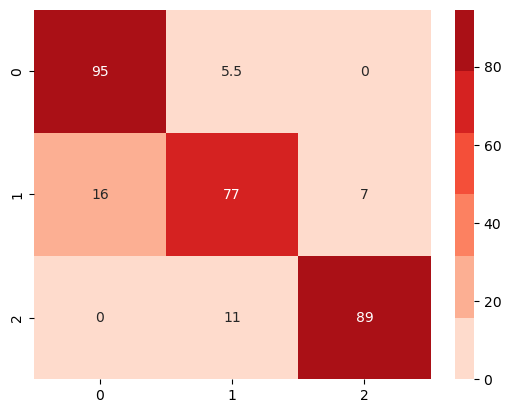

In [21]:
y_pred_RF = model.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

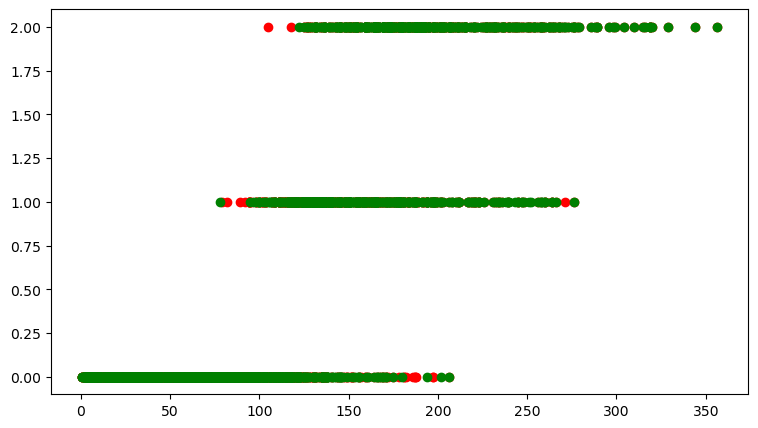

In [28]:
a=X_test["Cycle"]
b=y_test.array
fig = plt.figure(figsize=(9,5), dpi=100)
plt.scatter(a,y_test,c="red")
a1=X_test["Cycle"]
b1=y_pred_RF
plt.scatter(a1,b1,c="green")

In [29]:
import mpld3

In [30]:
temp = open("RFT.txt", 'w')
temp.write(mpld3.fig_to_html(fig))

125664